## Modelo 6

Se cargan las librerías.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import yaml

Se cargan los datos procesados.

In [2]:
segmentos = []

# Leer los archivos CSV segmentados y almacenarlos en la lista
for i in range(0,3):
    segmento = pd.read_csv(f'../data/processed/segmento_{i+1}.csv')
    segmentos.append(segmento)
# Concatenar los DataFrames de los segmentos en uno solo
df1 = pd.concat(segmentos, ignore_index=True)

Se separa el test del Dataframe original no balanceado para asegurar que los datos nuevos serán similares a los reales a predecir, manteniendo proporción en los datos

In [3]:
# Crear las variables para features y target
X = df1[['amt', 'city_pop', 'distancia', 'fraudes_por_Categoria',
       'fraudes_por_estado', 'fraudes_por_edad', 'fraudes_por_hora',
       'fraudes_por_día']]
y = df1['is_fraud']

# Separamos una muestra del DataFrame para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.1,
                                                   random_state=0, stratify=y)


Una vez obtenido el test, se pasa a balancear los datos, tanto para aligerar la carga del entrenamiento, como para intentar que el modelo prediga mejor la clase minoritaría.

In [4]:
# Aplicamos undersampling a los datos
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Separamos el nuevo conjunto en X e y
X_under = X_resampled
y_under = y_resampled

Se separa en train y test.

In [6]:
# # Volvemos a separar en test y train para que el test original y los datos del undersample no contaminen a examinar
# X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(X_under,
#                                                    y_under,
#                                                    test_size = 0.2,
#                                                    random_state=0)

Con un GridSearch, se hiperparametriza un SVC.

In [7]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", SVC())
])

# Definir los parámetros del GridSearchCV para regresión logística
svc_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(2, 9),
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__kernel': ['rbf'],
    'classifier__class_weight': [None, {0: 100, 1: 1}],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=svc_params, cv=3, scoring="roc_auc", verbose=10)

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV 1/3; 1/84] START classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2
[CV 1/3; 1/84] END classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2;, score=0.934 total time=   1.5s
[CV 2/3; 1/84] START classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2
[CV 2/3; 1/84] END classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2;, score=0.937 total time=   1.4s
[CV 3/3; 1/84] START classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2
[CV 3/3; 1/84] END classifier__C=0.1, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=2;, score=0.936 total time=   1.3s
[CV 1/3; 2/84] START cl

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__class_weight': [None, {0: 100, 1: 1}],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='roc_auc', verbose=10)

In [5]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", SVC())
])

# Definir los parámetros del GridSearchCV para regresión logística
svc_params = {'classifier__C': [10.0],
 'classifier__class_weight': [None],
 'classifier__kernel': ['rbf'],
 'scaler': [StandardScaler()],
 'selectkbest__k': [3]}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=svc_params, cv=3, scoring="roc_auc", verbose=10)

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3
[CV 1/3; 1/1] END classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3;, score=0.968 total time=   1.0s
[CV 2/3; 1/1] START classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3
[CV 2/3; 1/1] END classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3;, score=0.971 total time=   1.0s
[CV 3/3; 1/1] START classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3
[CV 3/3; 1/1] END classifier__C=10.0, classifier__class_weight=None, classifier__kernel=rbf, scaler=StandardScaler(), selectkbest__k=3;, score=0.971 total time=   1.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [10.0],
                         'classifier__class_weight': [None],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler()], 'selectkbest__k': [3]},
             scoring='roc_auc', verbose=10)

In [6]:
clf.best_params_

{'classifier__C': 10.0,
 'classifier__class_weight': None,
 'classifier__kernel': 'rbf',
 'scaler': StandardScaler(),
 'selectkbest__k': 3}

In [7]:
predictions = clf.predict(X_test)

[[114226  14691]
 [    39    712]]


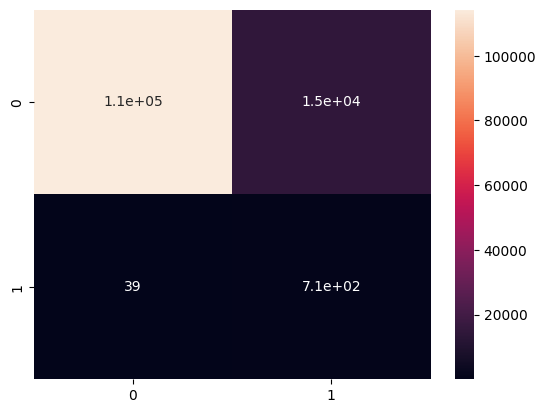

In [8]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [9]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [10]:
precision_score(y_test, predictions)

0.04622476141011491

In [11]:
recall_score(y_test, predictions)

0.948069241011984

In [12]:
roc_auc_score(y_test, predictions)

0.9170560994420517

In [14]:
# Para escribir el archivo pickle
with open('../models/Model6/trained_model.pkl', 'wb') as archivo_salida:
    pickle.dump(clf.best_estimator_, archivo_salida)

# Para escribir el archivo YAML
with open("../models/Model6/model_config.yaml", "w") as f:
    yaml.dump(clf.best_params_, f)

De los modelos hiperparametrizados, este es el mejor, por tanto, se ha guardado en formato pickle.

In [19]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", SVC())
])

# Definir los parámetros del GridSearchCV para regresión logística
svc_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k': np.arange(2, 9),
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__kernel': ['rbf'],
    'classifier__class_weight': [None, {0: 100, 1: 1}, {0: 50, 1: 1}],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=svc_params, cv=3, scoring="roc_auc")

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

{'classifier__C': 0.01,
 'classifier__class_weight': {0: 50, 1: 1},
 'classifier__max_iter': 1000,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear',
 'scaler': None,
 'selectkbest__k': 5}

In [ ]:
predictions = clf.predict(X_test)

[[128681    236]
 [   527    224]]


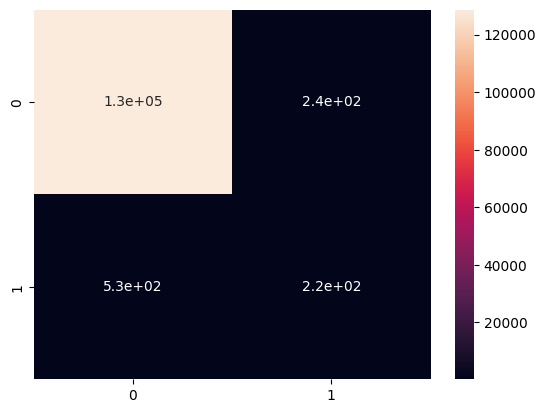

In [ ]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [ ]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.48695652173913045
Recall score: 0.2982689747003995
ROC AUC score: 0.648219169742747
